In [13]:
import pandas as pd

file_data = "Mall_Customers_no_CustomerID.csv"

df = pd.read_csv(file_data)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [9]:
from funcoes_auxiliares import grafico_elbow_silhouette
from funcoes_auxiliares import visualizar_grafico_3d

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [16]:
RANDOM_STATE = 42

preprocessing = ColumnTransformer(
    [
        ('scaler', StandardScaler(), ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']),
        ('onehot', OneHotEncoder(), ['Gender']),
    ]
)

pipe = Pipeline(
    [
        ('preprocessing', preprocessing),
        ('pca', PCA(n_components=3, random_state=RANDOM_STATE)),
        ('kmeans', KMeans(n_clusters=4, random_state=RANDOM_STATE, n_init=10))
    ]
)

pipe.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('pca', PCA(n_components=3, random_state=42)),
                ('kmeans', KMeans(n_clusters=4, n_init=10, random_state=42))])

In [ ]:
# import joblib
# joblib.dump(pipe, 'pipe_preprocessing_cluster_pca.pkl')

In [22]:
pipe['kmeans'].labels_

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [24]:
df_clustered = df.copy()
df_clustered['clusters'] = pipe['kmeans'].labels_
df_clustered

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,1
197,Male,32,126,74,3
198,Male,32,137,18,1


In [45]:
# df_clustered.to_csv(
#     'Mall_Customers_no_CustomerID_clustered.csv',
#     index=False,
# )

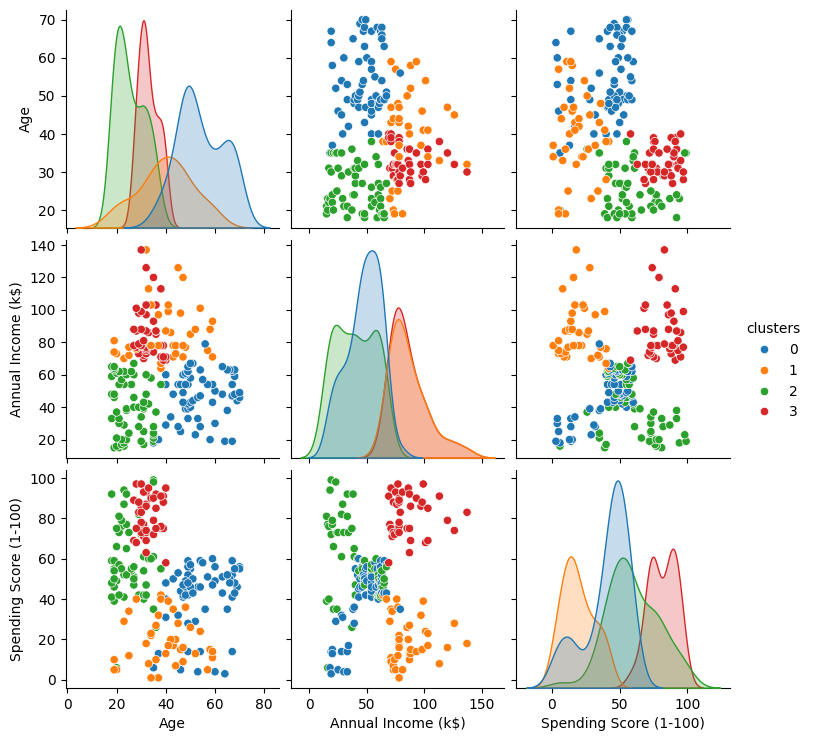

In [25]:
sns.pairplot(df_clustered, diag_kind='kde', hue='clusters', palette='tab10');

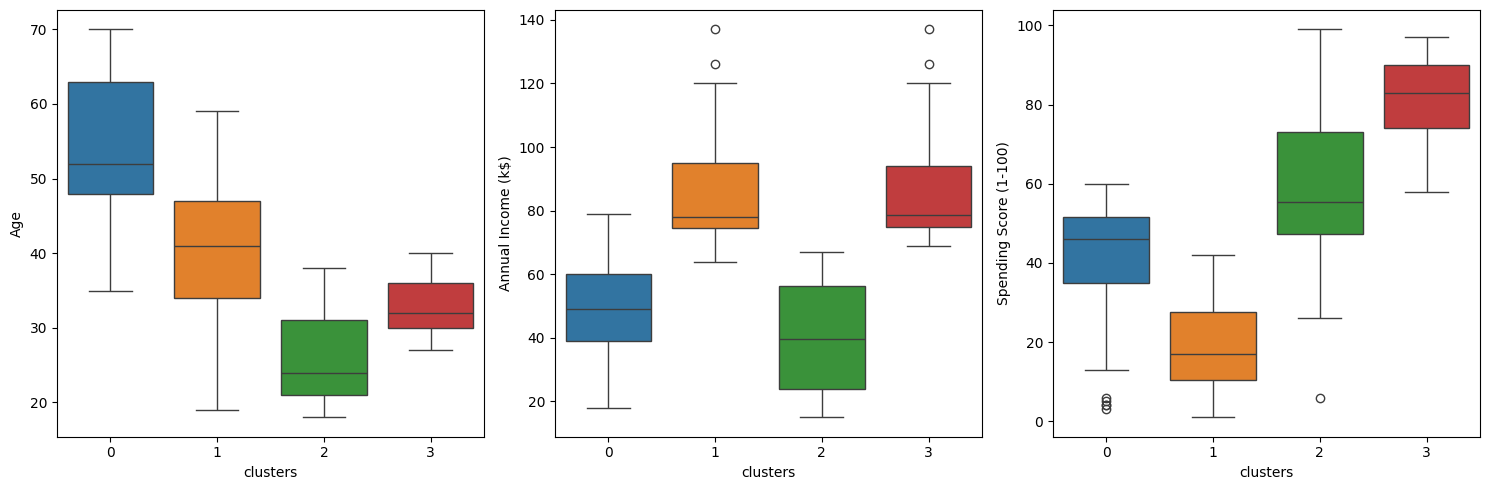

In [26]:
fig, axs = plt.subplots(ncols=3,figsize=(15, 5), tight_layout=True)

for ax, col in zip(axs, df_clustered.select_dtypes('number')):
  sns.boxplot(
      data=df_clustered, x='clusters', y=col, ax=ax,
      hue='clusters',palette='tab10', legend=False
    )

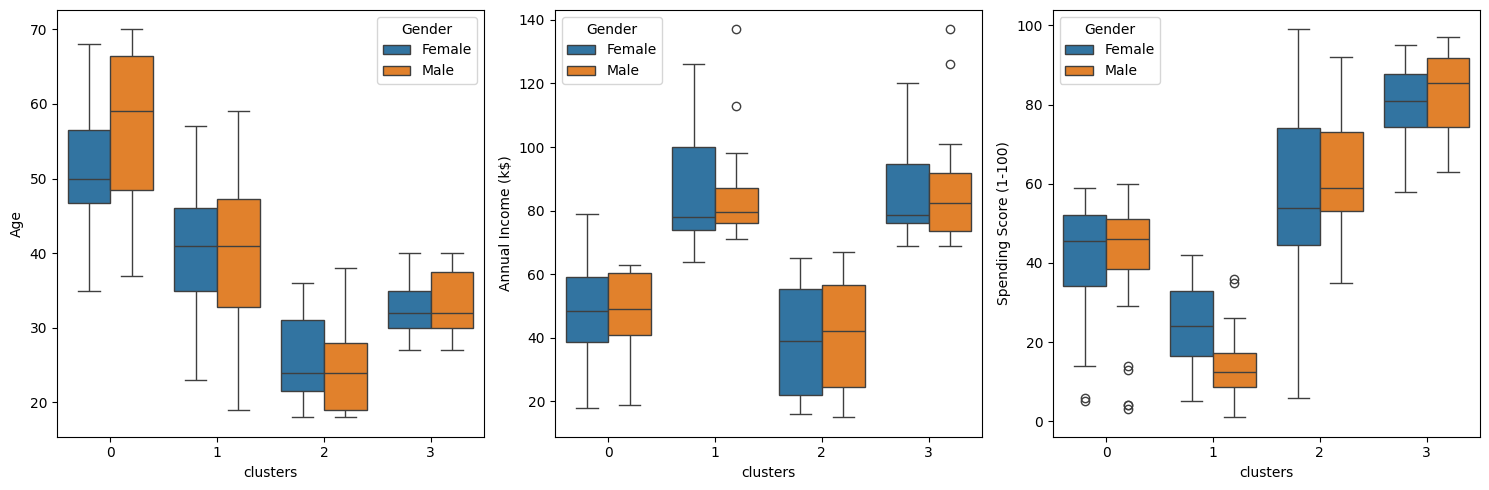

In [27]:
fig, axs = plt.subplots(ncols=3,figsize=(15, 5), tight_layout=True)

for ax, col in zip(axs, df_clustered.select_dtypes('number')):
  sns.boxplot(
      data=df_clustered, x='clusters', y=col, ax=ax,
      hue='Gender'
    )

In [30]:
pipe[:-1]

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('pca', PCA(n_components=3, random_state=42))])

In [31]:
df_pca = pd.DataFrame(
    pipe[:-1].fit_transform(df),
    columns = pipe[:-1].get_feature_names_out(),
)
df_pca

,pca0,pca1,pca2
0,-0.575724,-1.684874,1.315210
1,-1.623595,-1.726481,0.060149
2,0.279614,-1.725314,2.182574
3,-1.511064,-1.796205,0.080242
4,-0.095468,-1.707347,0.690684
...,...,...,...
195,-1.114233,2.173308,-0.600498
196,0.778106,2.470016,0.292237
197,-1.041613,2.517265,-0.323834
198,0.474021,2.994849,1.212524


In [43]:
# df_pca.to_csv(
#     'Mall_Customers_no_CustomerID_pca.csv',
#     index=False
#     )

In [33]:
centroids = pipe['kmeans'].cluster_centers_
centroids

array([[ 1.05594053, -0.46515952, -0.51334336],
       [ 0.86428392,  1.01369489,  0.7902107 ],
       [-0.90286757, -0.81796884,  0.41368228],
       [-1.19662519,  0.93032855, -0.56177895]])

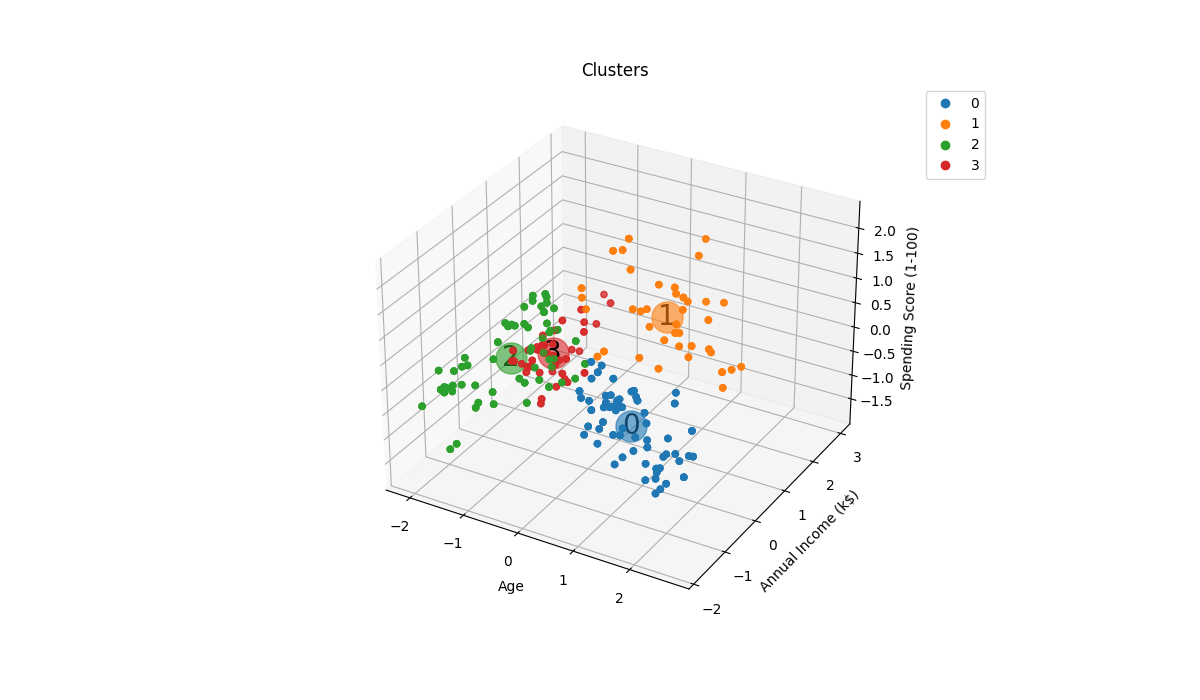

In [41]:
%matplotlib ipympl

visualizar_grafico_3d(
    dataframe= df_pca,
    colunas = ['pca0', 'pca1', 'pca2'],
    quantidade_de_cores= 4,
    centroides= centroids,
    coluna_clusters= df_clustered['clusters'],
)